In [15]:
%matplotlib inline

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sns.set_context("talk")
sns.set_style("ticks")
np.random.seed(1337)

In [27]:
kno=[0]
base_path = "/mnt/E/SummerIntern/AEImages/Known"

In [28]:
with open("KnownAE"+str(kno)+"train_error_kn.txt","r") as fp:
    train_error_kn = []
    for line in fp:
        for error in line.split():
            train_error_kn.append(np.float64(error))
    train_error_kn = np.array(train_error_kn)
with open("KnownAE"+str(kno)+"test_error_kn.txt","r") as fp:
    test_error_kn = []
    for line in fp:
        for error in line.split():
            if error[-1] == "]":
                continue
            if error[0] == "[":
                error = error[1:-1]
            error = np.float64(error)
            test_error_kn.append(error)
    test_error_kn = np.array(test_error_kn)
with open("KnownAE"+str(kno)+"test_error_unk.txt","r") as fp:
    test_error_unk = []
    for line in fp:
        for error in line.split():
            if error[-1] == "]":
                continue
            if error[0] == "[":
                error = error[1:-1]
            error = np.float64(error)
            test_error_unk.append(error)
    test_error_unk = np.array(test_error_unk)
test_error_per = np.load("KnownAE"+str(kno)+"test_error_per.npy", allow_pickle=True).item()
test_error_per = {
    int(k): np.array([vi[0] if isinstance(vi, list) else vi for vi in v]) for k,v in test_error_per.items()
}
train_error_per = np.load("KnownAE"+str(kno)+"train_error_per.npy", allow_pickle=True).item()
train_error_per = {int(k): np.array(v) for k,v in train_error_per.items()}
#test_derr_per = np.load("KnownAE"+str(kno)+"test_derr_per.npy", allow_pickle=True).item()
#test_derr_per = {int(k): np.array(v) for k,v in test_derr_per.items()}
#test_derr_per = {k: v if len(v.shape) == 1 else v[:, 0] for k,v in test_derr_per.items()}
#train_derr_per = np.load("KnownAE"+str(kno)+"train_derr_per.npy", allow_pickle=True).item()
#train_derr_per = {int(k): np.array(v) for k,v in train_derr_per.items()}

In [29]:
train_error_kn.shape, test_error_kn.shape, test_error_unk.shape

((5923,), (980,), (63097,))

In [30]:
np.array(test_error_per[2])

array([0.07098422, 0.05194014, 0.09340375, ..., 0.05394157, 0.07187017,
       0.06485645])

In [31]:
for data_dict in [train_error_per, test_error_per]:
    for k,v in data_dict.items():
        print(f"{k}={v.shape[0]:05d} [{v.dtype}]", end=",")
    print()
    print("=="*10)

0=05923 [float64],1=00000 [float64],2=00000 [float64],3=00000 [float64],4=00000 [float64],5=00000 [float64],6=00000 [float64],7=00000 [float64],8=00000 [float64],9=00000 [float64],
0=00980 [float64],1=07877 [float64],2=06990 [float64],3=07141 [float64],4=06824 [float64],5=06313 [float64],6=06876 [float64],7=07293 [float64],8=06825 [float64],9=06958 [float64],


In [32]:
tmp = np.hstack(list(test_error_per.values()))
print(tmp)
bins=np.histogram(tmp,bins=40)[1]
bins


[0.0164279  0.02150923 0.01059268 ... 0.07280217 0.0592522  0.04669321]


array([0.00641928, 0.01044159, 0.01446391, 0.01848622, 0.02250853,
       0.02653084, 0.03055315, 0.03457546, 0.03859777, 0.04262008,
       0.04664239, 0.0506647 , 0.05468701, 0.05870932, 0.06273163,
       0.06675394, 0.07077626, 0.07479857, 0.07882088, 0.08284319,
       0.0868655 , 0.09088781, 0.09491012, 0.09893243, 0.10295474,
       0.10697705, 0.11099936, 0.11502167, 0.11904398, 0.1230663 ,
       0.12708861, 0.13111092, 0.13513323, 0.13915554, 0.14317785,
       0.14720016, 0.15122247, 0.15524478, 0.15926709, 0.1632894 ,
       0.16731171])

In [33]:
c, loc, scale = stats.genextreme.fit(test_error_per[kno[0]], loc=test_error_per[kno[0]].mean(), scale=test_error_per[kno[0]].std())
extreme_dist = stats.genextreme(c, loc, scale)
print(extreme_dist.stats("mvsk"))

(array(0.02215795), array(0.0001194), array(2.15952266), array(10.78795742))


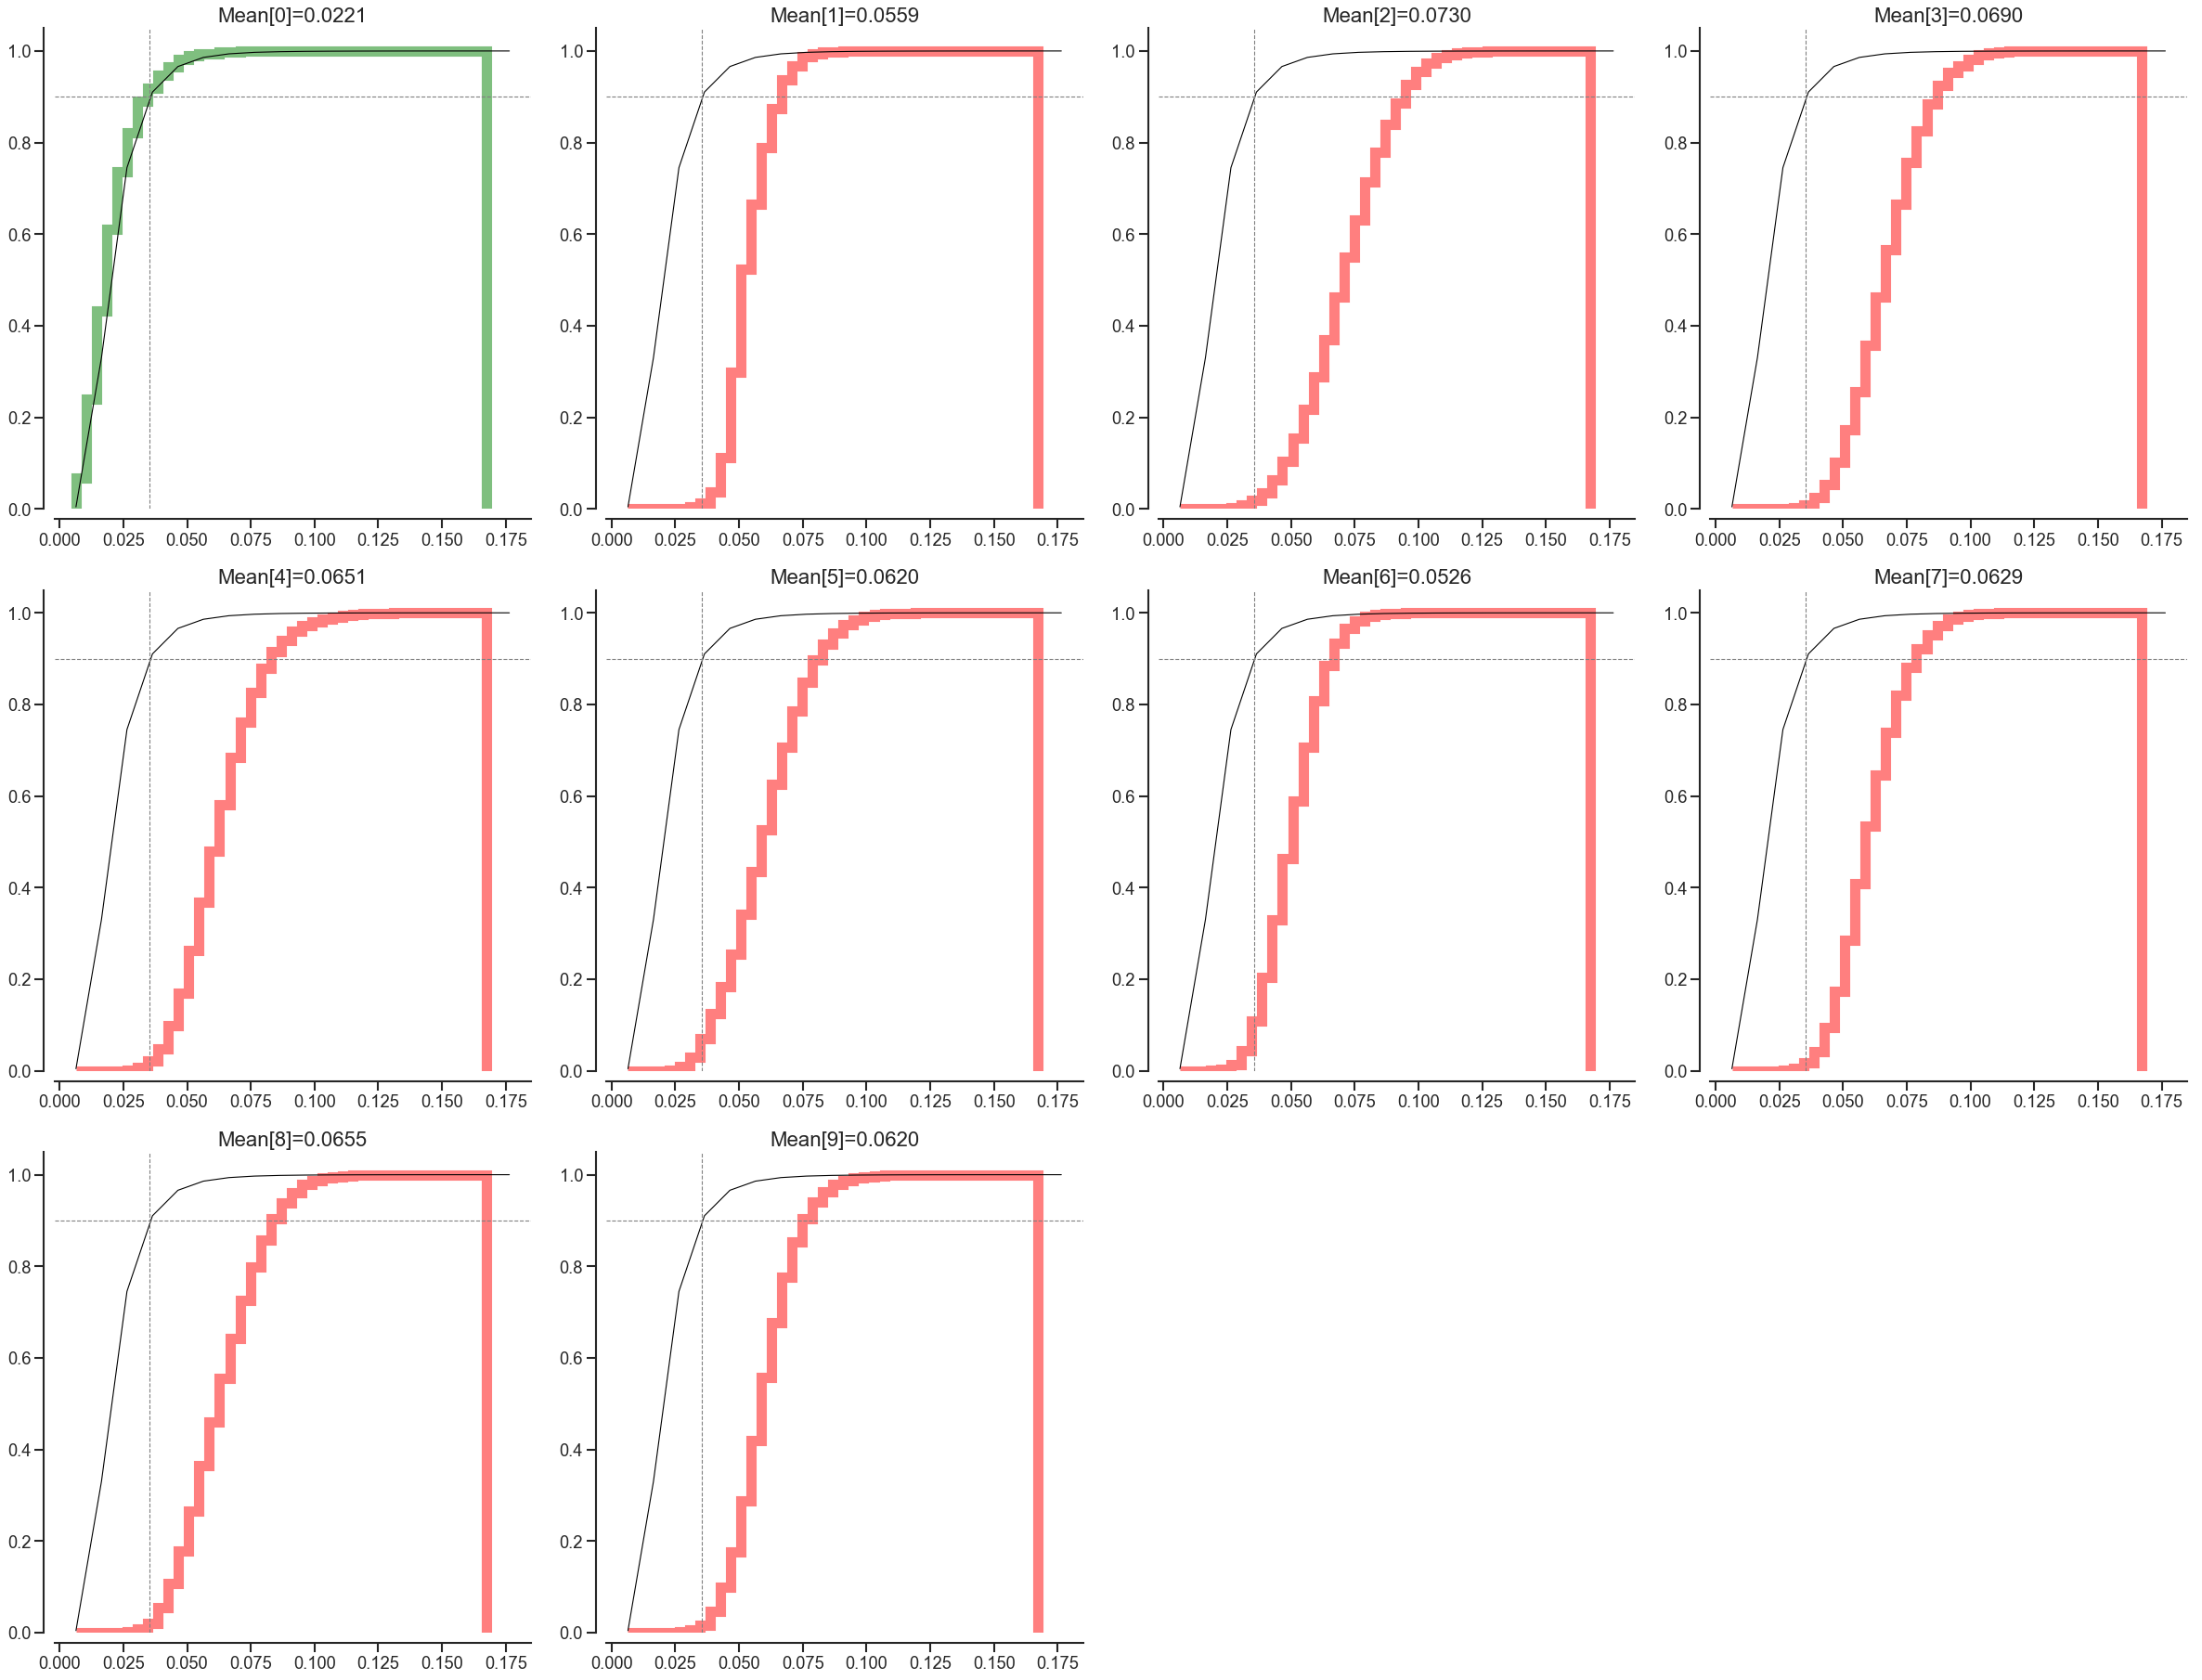

In [34]:
fig=plt.figure(figsize=(30,30),dpi=80)
#ind=['1','2','3','4','6','7','8','9']
ax = None
x = np.arange(bins[0], bins[-1]+0.01, 0.01)
threshhold_cdf = 0.9
threshhold_x = extreme_dist.ppf(threshhold_cdf)
for i in range(10):
    errors=test_error_per[i]
    #errors=np.array(errors) 
    ax=fig.add_subplot(4,4,i+1, sharex=ax, sharey=ax)
    color = "red"
    if i in kno:
        color = "green"
    ax.hist(
        errors, bins, cumulative=True, density=True,
        #weights=np.ones_like(errors)/np.shape(errors)[0], 
        edgecolor=color, linewidth=10, histtype="step", alpha=0.5
    )
    ax.plot(x, extreme_dist.cdf(x), lw=1, color="k")
    ax.axhline(y=threshhold_cdf, lw=1, linestyle="--", color="0.5")
    ax.axvline(x=threshhold_x, lw=1, linestyle="--", color="0.5")
    ax.set_title(f"Mean[{i}]={np.mean(errors):.4f}", fontsize=20)
sns.despine(offset=10)
fig.tight_layout()

In [35]:
extreme_dist.cdf(errors)

array([0.995398  , 0.97957508, 0.96153225, ..., 0.99605429, 0.98885672,
       0.96686239])

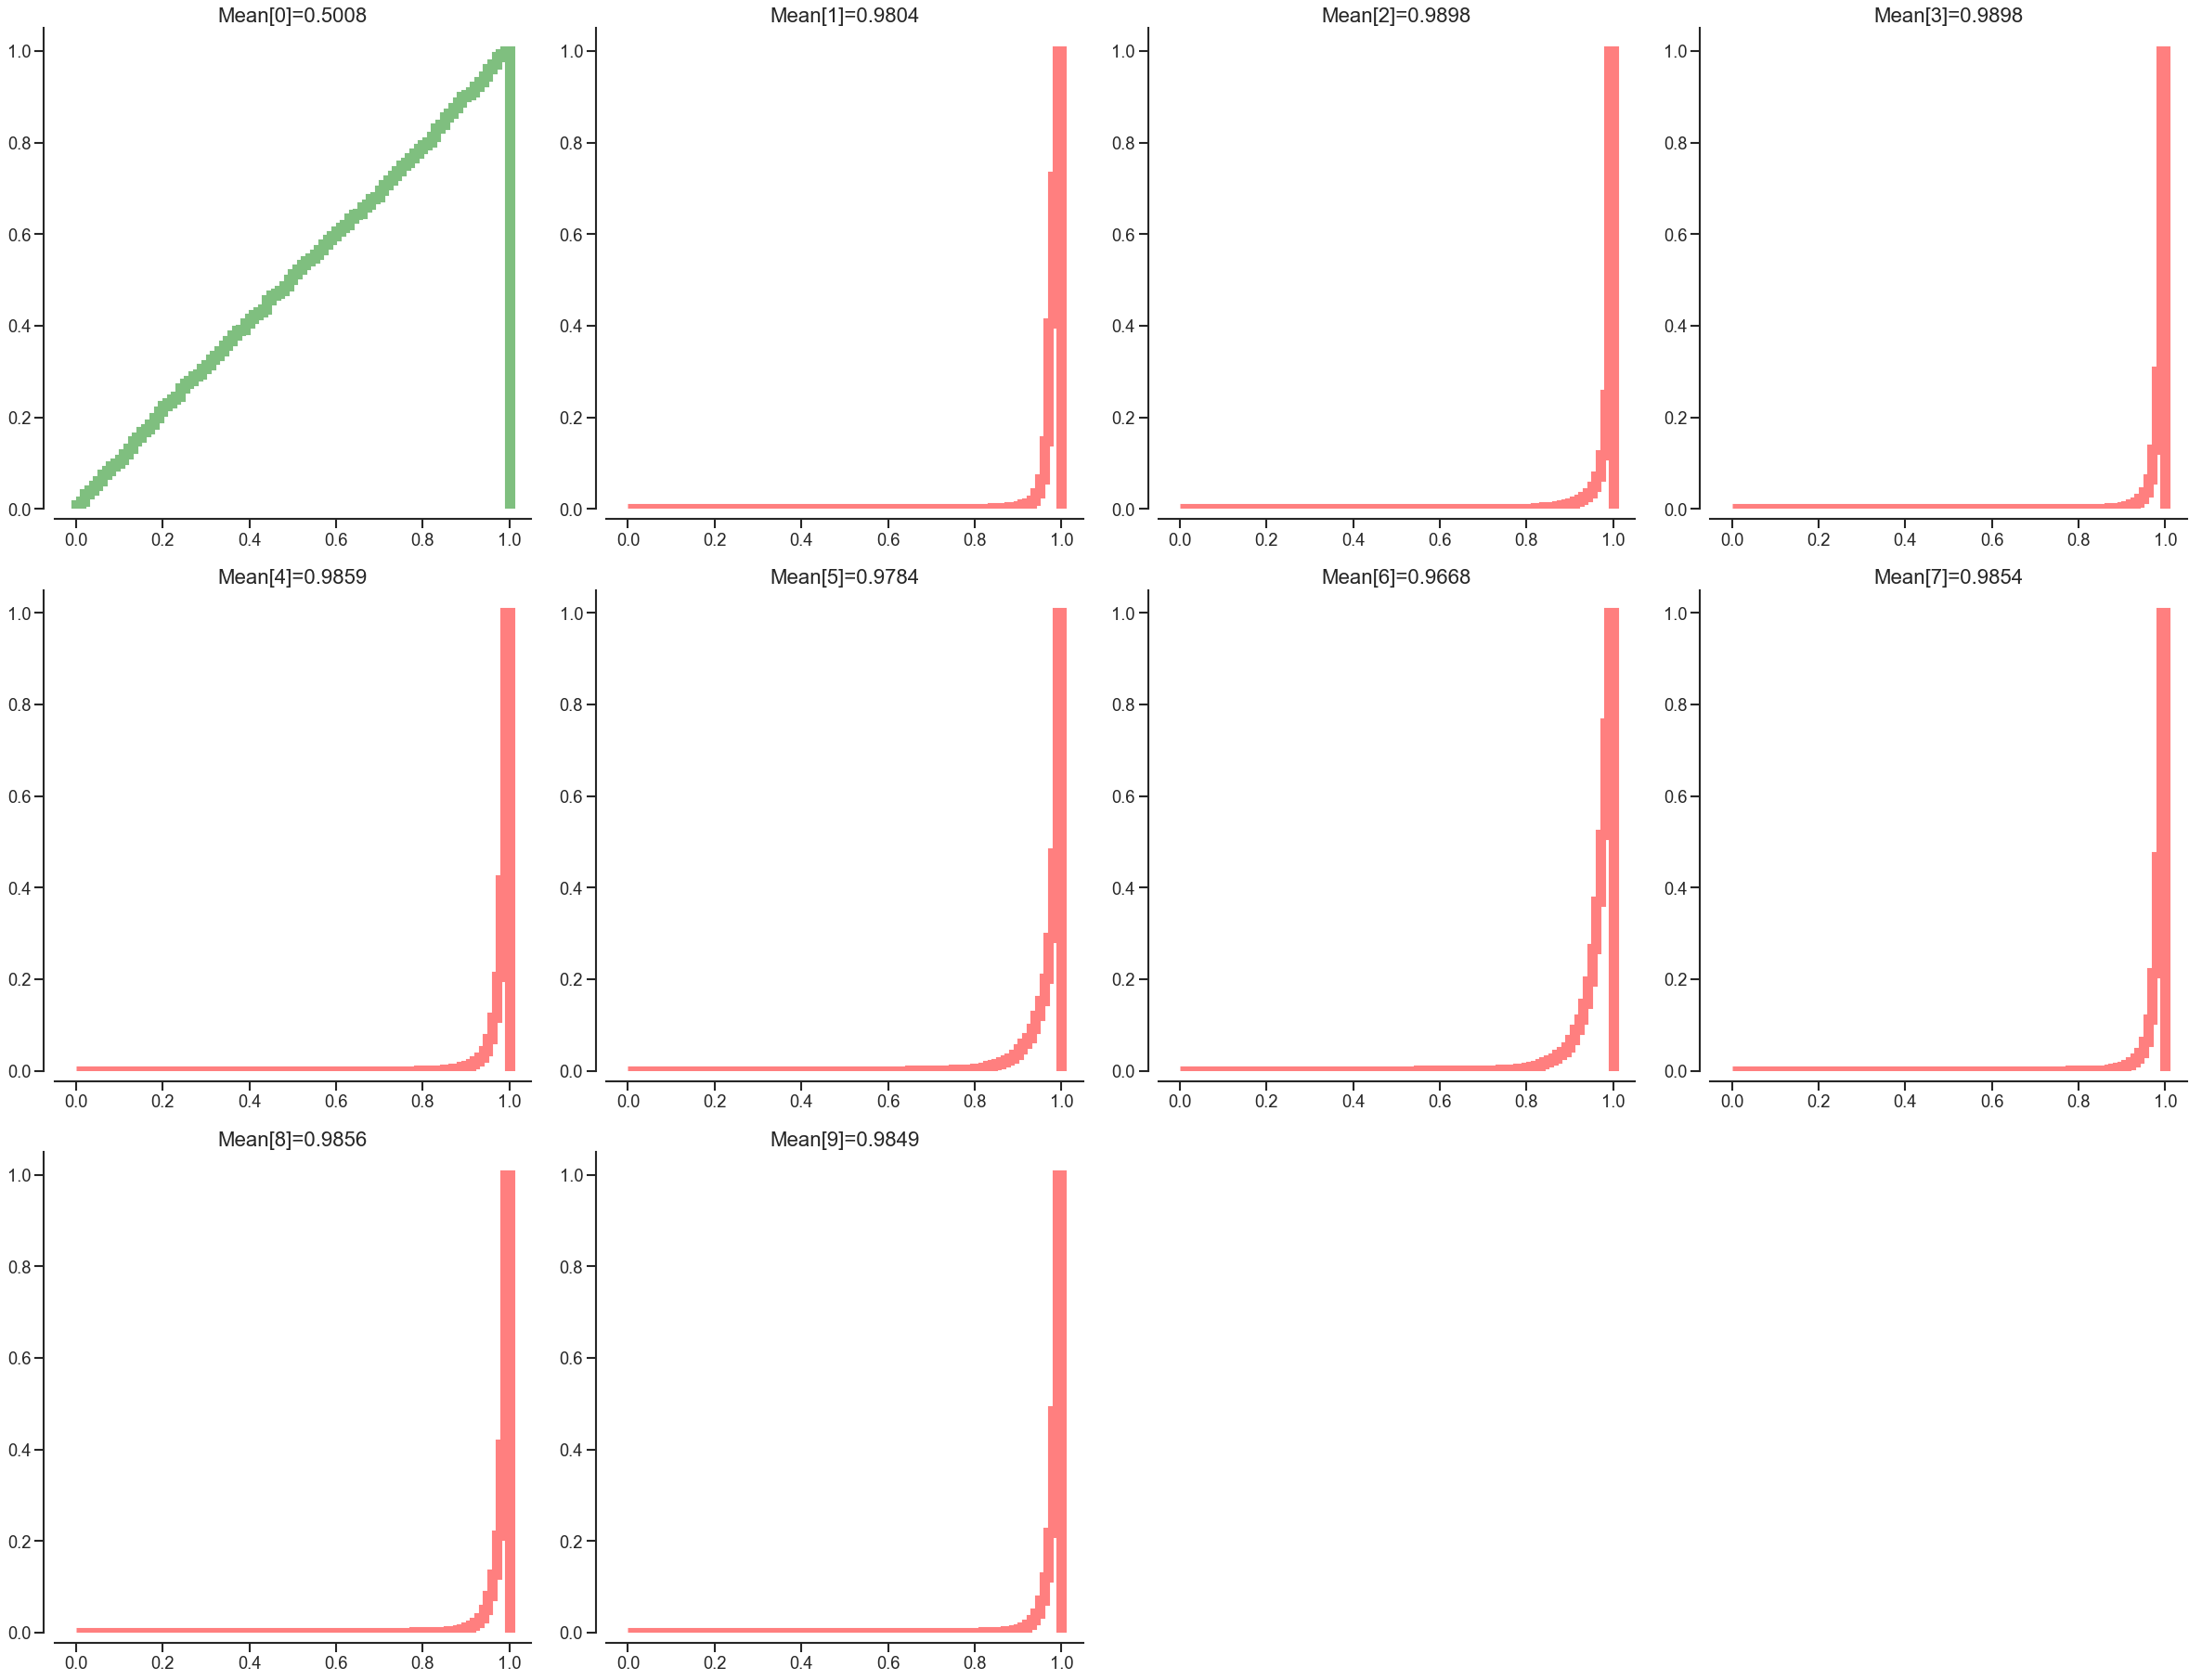

In [36]:
fig=plt.figure(figsize=(30,30),dpi=80)
#ind=['1','2','3','4','6','7','8','9']
ax = None
bins = np.arange(0, 1.01, 0.01)
for i in range(10):
    errors=test_error_per[i]
    ax=fig.add_subplot(4,4,i+1, sharex=ax, sharey=ax)
    color = "red"
    if i in kno:
        color = "green"
    errors_cdf = extreme_dist.cdf(errors)
    ax.hist(
        errors_cdf, bins, cumulative=True, density=True,
        edgecolor=color, linewidth=10, histtype="step", alpha=0.5
    )
    ax.set_title(f"Mean[{i}]={np.mean(errors_cdf):.4f}", fontsize=20)
sns.despine(offset=10)
fig.tight_layout()